In [486]:
import yfinance as yf

df = yf.Ticker("0050.TW").history(period="max")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-01-02,60.009998,60.009998,60.009998,60.009998,0,0,0
2008-01-03,58.889999,58.889999,58.889999,58.889999,0,0,0
2008-01-04,59.009998,59.009998,59.009998,59.009998,0,0,0
2008-01-07,56.389999,56.389999,56.389999,56.389999,0,0,0
2008-01-08,56.980000,56.980000,56.980000,56.980000,0,0,0
...,...,...,...,...,...,...,...
2022-09-29,106.449997,106.449997,104.599998,104.900002,10402108,0,0
2022-09-30,103.300003,103.900002,103.000000,103.449997,12676428,0,0
2022-10-03,102.500000,103.599998,102.050003,102.199997,10992367,0,0


In [487]:
import tushare as ts
ts.get_hist_data('0050', start='2022-09-27', end='2022-10-03') 

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


In [488]:

# import yfinance as yf
# import pandas as pd
# import time
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# import pywt


# def getkdatas(datestart, dateend):
#     results1 = yf.Ticker(stockno).history(start=datestart, end=dateend)
#     # results1 = ts.get_hist_data(stockno, start=datestart, end=dateend)  # 获取  日k线数据
#     print(results1.index)
#     # results1.set_index('date')
#     results1['date'] = results1.index
#     results1.sort_values("date", inplace=True)
#     results1.to_csv(csv_filepath1, index=False, encoding='gbk')
#     return 0

# # 函数功能：将频域数据转换成时序数据
# # bins为频域数据，n设置使用前多少个频域数据，loop设置生成数据的长度
# def fft_combine(bins, n, loops=1):
#     length = int(len(bins) * loops)
#     data = np.zeros(length)
#     index = loops * np.arange(0, length, 1.0) / length * (2 * np.pi)
#     for k, p in enumerate(bins[:n]):
#         if k != 0 : p *= 2 # 除去直流成分之外, 其余的系数都 * 2
#         data += np.real(p) * np.cos(k*index) # 余弦成分的系数为实数部分
#         data -= np.imag(p) * np.sin(k*index) # 正弦成分的系数为负的虚数部分
#     return index, data

# def analyze_wavelet(dataform1):
#     w = pywt.Wavelet('sym5')  # 选取小波函数

#     ts_log = np.log(dataform1["ma5"])
#     ts_diff = ts_log.dropna()
#     a = ts_diff
#     ca = []  # 近似分量
#     cd = []  # 细节分量
#     mode = pywt.Modes.smooth
#     for i in range(3 ):
#         (a, d) = pywt.dwt(a, w, mode)  #  离散小波变换
#         ca.append(a)
#         cd.append(d)
#     rec_a = []
#     rec_d = []
#     for i, coeff in enumerate(ca):
#         coeff_list = [coeff, None] + [None] * i
#         rec_a.append(pywt.waverec(coeff_list, w))  # 重构
#     for i, coeff in enumerate(cd):
#         coeff_list = [None, coeff] + [None] * i
#         rec_d.append(pywt.waverec(coeff_list, w))
#     rowstotal = len(rec_a) + 1
#     fig = plt.figure()
#     ax_main = fig.add_subplot(rowstotal, 1, 1)
#     ax_main.plot(dataform1["ma5"])
#     ax_main.set_xlim(0, len(ts_diff)  )

#     for i, y in enumerate(rec_a):
#         ax = fig.add_subplot(rowstotal, 2, 3 + i * 2)
#         ax.plot(y, 'r')
#         ax.set_xlim(0, len(y)  )
#         ax.set_ylabel("A%d" % (i + 1))
#     for i, y in enumerate(rec_d):
#         ax = fig.add_subplot(rowstotal, 2, 4 + i * 2)
#         ax.plot(y, 'g')
#         ax.set_xlim(0, len(y)  )
#         ax.set_ylabel("D%d" % (i + 1))

#     plt.show()
#     return 0
# def analyze_fft(dataform1):
#     print('\n ma5: %s ' % (dataform1.columns.values[7]))

#     lines = dataform1.shape[0]
#     # 生成随机数
#     x = np.random.random(100)
#     y = np.fft.fft(x)
#     plt.subplot(2, 1, 1)
#     # plt.plot(x)
#     plt.plot(dataform1["ma5"])
#     plt.xlabel('Time'), plt.ylabel('ma5')

#     #dft_a = np.fft.fft(dataform1["ma5"])

#     plt.subplot(2, 1, 2)
#     """
#     plt.plot(dft_a)
#     #plt.plot(y)
#     plt.xlabel('Freq (Hz)'), plt.ylabel(' ')
#     plt.show()"""
#     ts_log = np.log(dataform1["ma5"])
#     #ts_log = dataform1["ma5"]
#     #ts_diff = ts_log.diff(1)
#     ts_diff = ts_log
#     ts_diff = ts_diff.dropna()
#     fy = np.fft.fft(ts_diff)
#     conv1 = np.real(np.fft.ifft(fy))  # 逆变换
#     index, conv2 = fft_combine(fy / len(ts_diff), int(len(fy) / 2 - 1), 1.3)
#     ntotal = (len(ts_diff)/10 +2)*10

#     plt.plot(ts_diff)
#     plt.plot(conv1 - 0.5)
#     plt.plot(conv2 - 1)
#     plt.xticks(np.arange(1, ntotal, 5))
#     plt.grid( )
#     plt.show()
#     return 0

# stockno = '0050.tw'
# csv_filepath1 = r'C:\Users\e4903\Desktop\code\stock\test\\'+ stockno + '_k.csv'
# date_0 = '2019-01-15'
# date_1 = '2019-04-25'

# getkdatas(date_0, date_1)

# # 读取股票数据 m5曲线
# df = pd.read_csv(csv_filepath1, encoding='gbk')
# df.fillna(0, inplace=True)
# df.replace('nan ', 0, inplace=True)

# df['ma5'] = df['ma5'].astype(float)

# analyze_fft(df)
# analyze_wavelet(df)
# #打印 股票详细信息，编码，公司名等
# realtimeinfo = ts.get_realtime_quotes(stockno)
# print(realtimeinfo)




In [489]:
import yfinance as yf

df = yf.Ticker("0050.TW").history(period="max")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-01-02,60.009998,60.009998,60.009998,60.009998,0,0,0
2008-01-03,58.889999,58.889999,58.889999,58.889999,0,0,0
2008-01-04,59.009998,59.009998,59.009998,59.009998,0,0,0
2008-01-07,56.389999,56.389999,56.389999,56.389999,0,0,0
2008-01-08,56.980000,56.980000,56.980000,56.980000,0,0,0
...,...,...,...,...,...,...,...
2022-09-29,106.449997,106.449997,104.599998,104.900002,10402108,0,0
2022-09-30,103.300003,103.900002,103.000000,103.449997,12676428,0,0
2022-10-03,102.500000,103.599998,102.050003,102.199997,10992367,0,0


Date
2021-01-04    124.349998
2021-01-05    124.599998
2021-01-06    125.949997
2021-01-07    128.899994
2021-01-08    131.199997
                 ...    
2022-01-20    149.100006
2022-01-21    142.649994
2022-01-24    144.000000
2022-01-25    141.649994
2022-01-26    141.550003
Name: Close, Length: 261, dtype: float64
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object


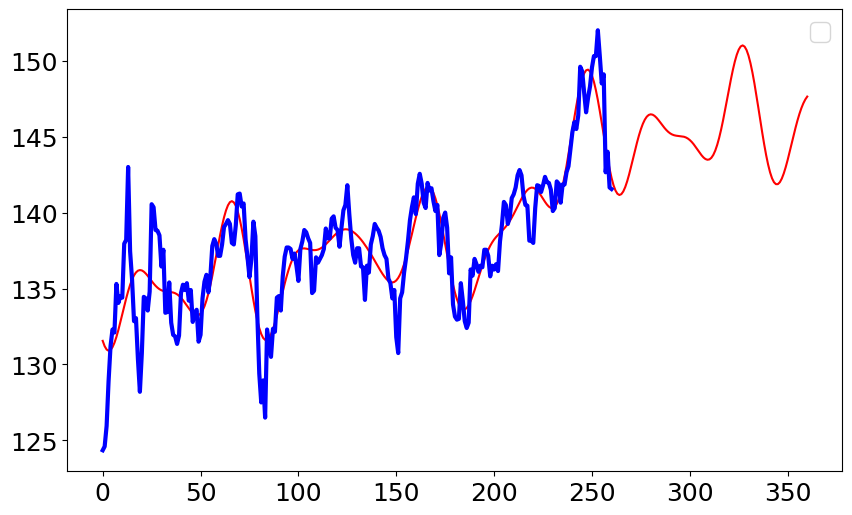

Date
2021-01-04    124.349998
2021-01-05    124.599998
2021-01-06    125.949997
2021-01-07    128.899994
2021-01-08    131.199997
                 ...    
2022-09-26    107.650002
2022-09-27    107.500000
2022-09-28    105.250000
2022-09-29    104.900002
2022-09-30    103.449997
Name: Close, Length: 425, dtype: float64
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object


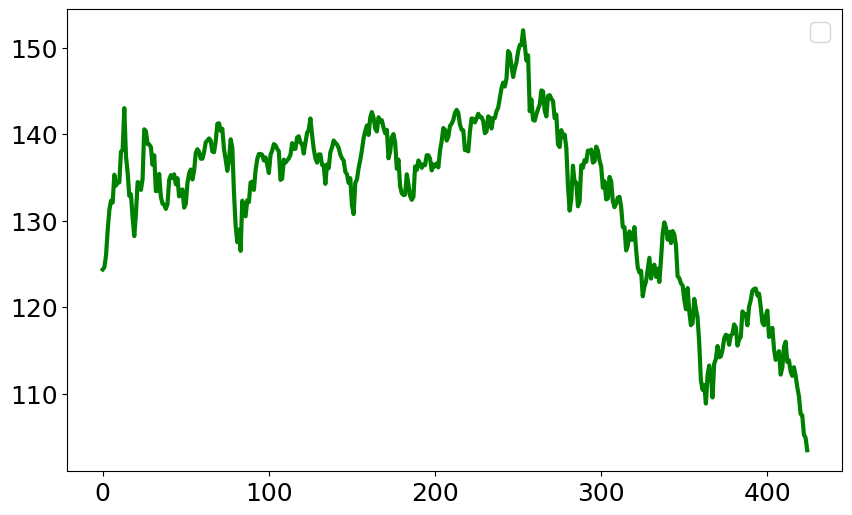

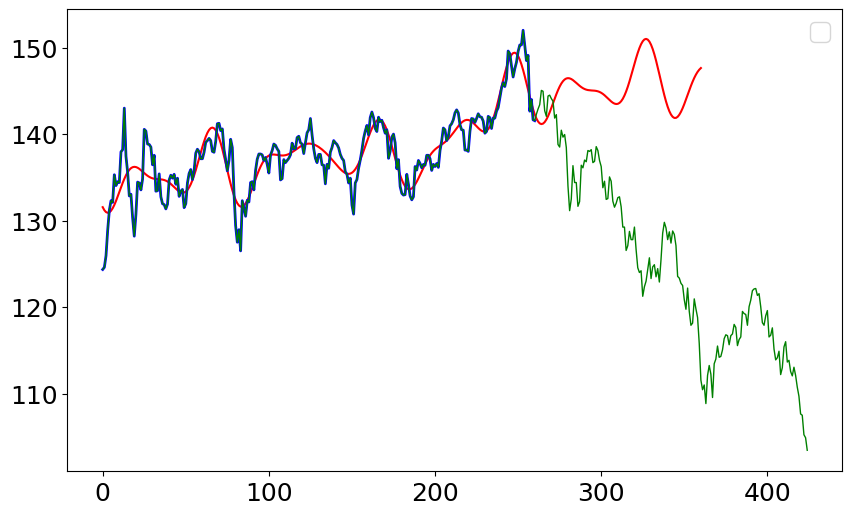

In [610]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 26 09:15:25 2018
@author: bumurzokov
"""

import numpy as np
import pylab as pl
from numpy import fft
import pandas as pd
import yfinance as yf

def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n) 
    indexes = list(range(n))             # frequencies
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

#Open csv file and parse Close value 
def main():
    date_0 = '2021-01-01'
    date_1 = '2022-02-01'
    data = yf.Ticker("0050.TW").history(start=date_0, end=date_1)
    # data = pd.read_csv('MSFTnew.csv')
    price = data['Close']
    print(price)
    print(data.dtypes);
    x = np.array(price)
    n_predict = 100
    extrapolation = fourierExtrapolation(x, n_predict)
    # fig, axes = plt.subplots(2, 1, figsize=(10, 6))
    # axes[0].plot(np.arange(0, extrapolation.size), extrapolation, 'r')
    # axes[1].plot(np.arange(0, x.size), x, 'b', linewidth = 3)
    # pl.legend()
    # pl.show()

    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r')
    pl.plot(np.arange(0, x.size), x, 'b', linewidth = 3)
    pl.legend()
    pl.show()

    date_0 = '2021-01-01'
    date_2 = '2022-10-01'
    data2 = yf.Ticker("0050.TW").history(start=date_0, end=date_2)
    price2 = data2['Close']
    print(price2)
    print(data2.dtypes);
    x2 = np.array(price2)
    pl.plot(np.arange(0, x2.size), x2, 'g', linewidth = 3)
    pl.legend()
    pl.show()


    
    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r')
    pl.plot(np.arange(0, x.size), x, 'b', linewidth = 2)
    pl.plot(np.arange(0, x2.size), x2, 'g', linewidth = 1)
    pl.legend()
    pl.show()
    
if __name__ == "__main__":
    main()

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49, -0.5 , -0.49, -0.48, -0.47,
       -0.46, -0.45, -0.44, -0.43, -0.42, -0.41, -0.4 , -0.39, -0.38,
       -0.37, -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3 , -0.29,
       -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2 ,
       -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11,
       -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01])

[0,
 1,
 99,
 2,
 98,
 3,
 97,
 4,
 96,
 5,
 95,
 6,
 94,
 7,
 93,
 8,
 92,
 9,
 91,
 10,
 90,
 11,
 89,
 12,
 88,
 13,
 87,
 14,
 86,
 15,
 85,
 16,
 84,
 17,
 83,
 18,
 82,
 19,
 81,
 20,
 80,
 21,
 79,
 22,
 78,
 23,
 77,
 24,
 76,
 25,
 75,
 26,
 74,
 27,
 73,
 28,
 72,
 29,
 71,
 30,
 70,
 31,
 69,
 32,
 68,
 33,
 67,
 34,
 66,
 35,
 65,
 36,
 64,
 37,
 63,
 38,
 62,
 39,
 61,
 40,
 60,
 41,
 59,
 42,
 58,
 43,
 57,
 44,
 56,
 45,
 55,
 46,
 54,
 47,
 53,
 48,
 52,
 49,
 51,
 50]

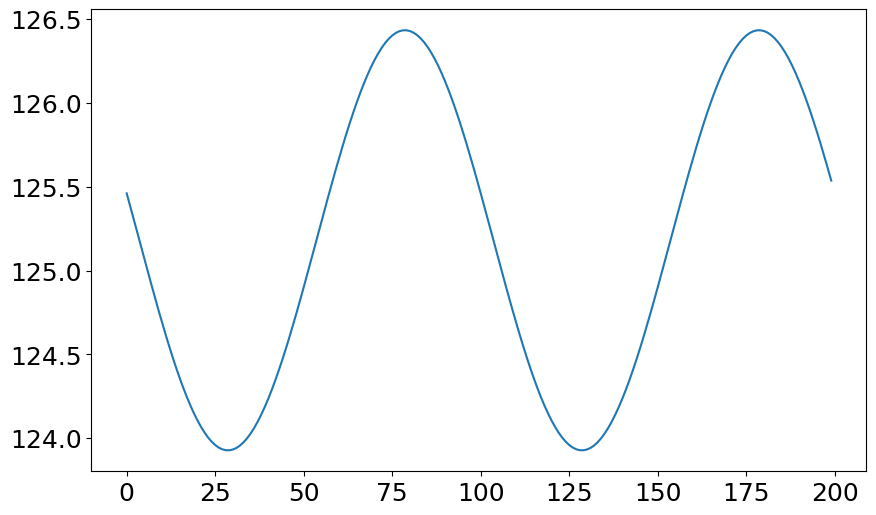

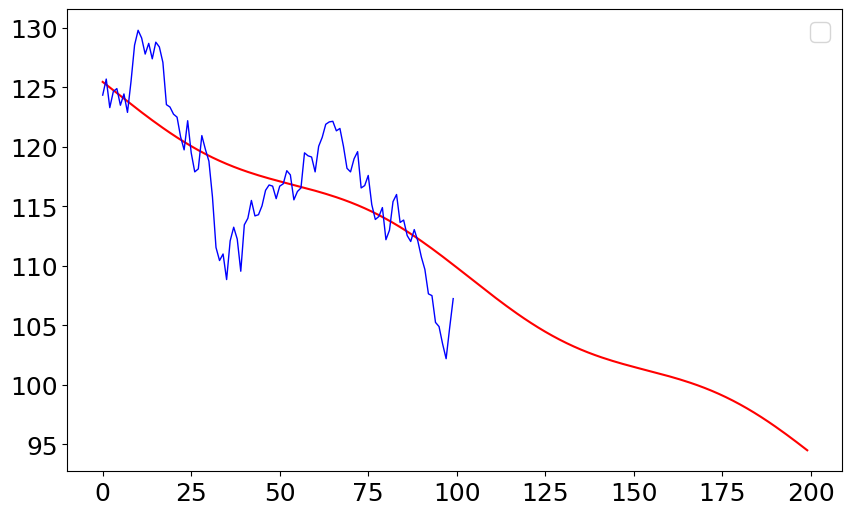

In [599]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 26 09:15:25 2018
@author: bumurzokov
"""

import numpy as np
import pylab as pl
from numpy import fft
import pandas as pd

def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 1                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n) 
    indexes = list(range(n))             # frequencies

    indexes.sort(key = lambda i: np.absolute(f[i]))  # sort indexes by frequency, lower -> higher
    display(f)
    display(indexes)
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    pl.plot(restored_sig)
    pl.show()
    return restored_sig + p[0] * t

#Open csv file and parse Adj close value 
def main():
    data = yf.Ticker("0050.TW").history(period="100d")
    # data = pd.read_csv('MSFTnew.csv')
    price = data['Close']
    # print(price)
    # print(data.dtypes);
    x = np.array(price)
    n_predict = 100
    extrapolation = fourierExtrapolation(x, n_predict)
    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r')
    pl.plot(np.arange(0, x.size), x, 'b', linewidth = 1)
    pl.legend()
    pl.show()
    
if __name__ == "__main__":
    main()

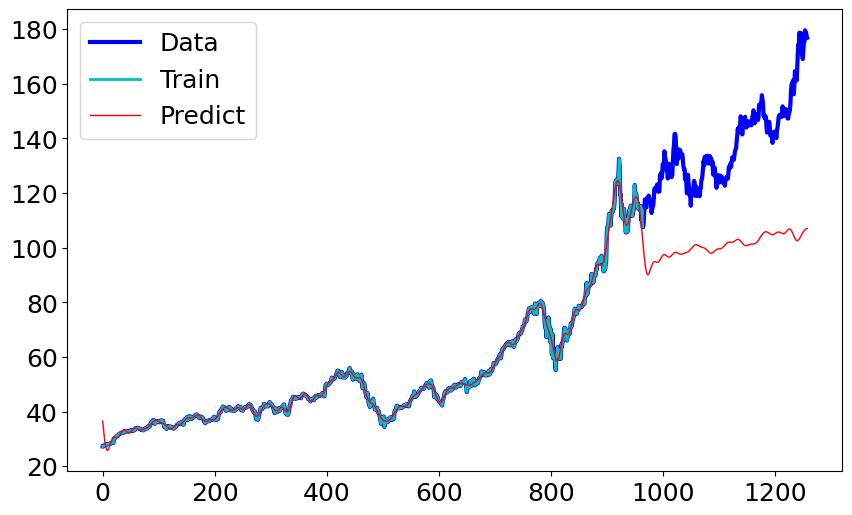

In [587]:
import numpy as np
import pylab as pl
from numpy import fft
from datetime import datetime
from pandas_datareader import data as pdr

"""
https://gist.github.com/tartakynov/83f3cd8f44208a1856ce
"""

def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 50
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)
    x_notrend = x - p[0] * t
    x_freqdom = fft.fft(x_notrend)
    f = fft.fftfreq(n)
    indexes = list(range(n))
    indexes.sort(key=lambda i: np.absolute(f[i]))

    #indexes.sort(key=lambda i: np.absolute(x_freqdom[i]))
    #indexes.reverse()
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n
        phase = np.angle(x_freqdom[i])
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    

data = pdr.get_data_yahoo('AAPL', datetime(2017, 1, 1), datetime(2022, 1, 1))
hist = data.loc[:,'Adj Close'].values
train = data.loc[:'2020-11-01','Adj Close'].values

n_predict = len(hist) - len(train)
extrapolation = fourierExtrapolation(train, n_predict)
pl.plot(np.arange(0, hist.size), hist, 'b', label = 'Data', linewidth = 3)
pl.plot(np.arange(0, train.size), train, 'c', label = 'Train', linewidth = 2)
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'Predict', linewidth = 1)

pl.legend()
pl.show()

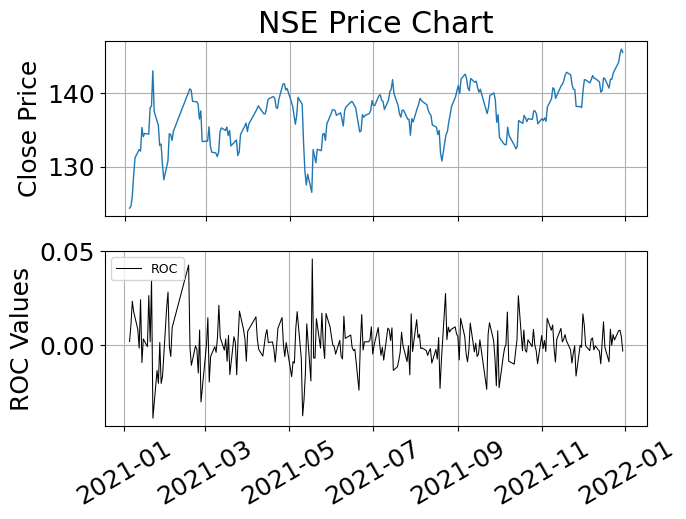

In [558]:

#import library modules
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf

#Compute Roc
def ROC(data,n):
 N=data['Close'].diff(n)
 D=data['Close'].shift(n)
 ROC=pd.Series(N/D,name='Rate of Change')
 data=data.join(ROC)
 return data
date_0 = '2021-01-01'
date_1 = '2022-01-01'
data = yf.Ticker("0050.TW").history(start=date_0, end=date_1)
data=pd.DataFrame(data)

n=1
ROC_Nifty=ROC(data,n)
ROC=ROC_Nifty['Rate of Change']

#represent them in chart
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(2,1,1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('NSE Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx=fig.add_subplot(2,1,2)
plt.plot(ROC,'k',lw=0.75,linestyle='-',label='ROC')
plt.legend(loc=2,prop={'size':9})
plt.ylabel('ROC Values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(),rotation=30)
plt.show()

[0.0020104543873559304,
 0.010834658833494952,
 0.023421969191904445,
 0.01784331389189106,
 0.008384193057181034,
 -0.0015116926956074642,
 0.024224048451100145,
 -0.009238728542539822,
 0.003356933517326665,
 -0.0007435398030901487,
 0.026413714382249487,
 0.0018122508556038472,
 0.03473229491861335,
 -0.03881121015215253,
 -0.01345937348709575,
 -0.020280235075363334,
 0.001505434242030456,
 -0.020293099483747183,
 -0.016494123932499383,
 0.019890819909982663,
 0.02829825581829589,
 -0.0007437028411763738,
 -0.005954618648408668,
 0.00935979012681533,
 0.04265578538445752,
 -0.0014229594016340094,
 -0.010687566332513516,
 -0.00036012279121208076,
 -0.0021614052245081212,
 -0.014801466077673736,
 0.00806160592244554,
 -0.030170912854955424,
 0.00037483548759840145,
 0.014612191778456785,
 -0.01957159539098902,
 -0.006026388337158663,
 -0.0007577934599406185,
 -0.003792187916983859,
 0.004187192747713389,
 0.021228227303446773,
 0.004083170484177134,
 -0.0025878454973428835,
 0.003335

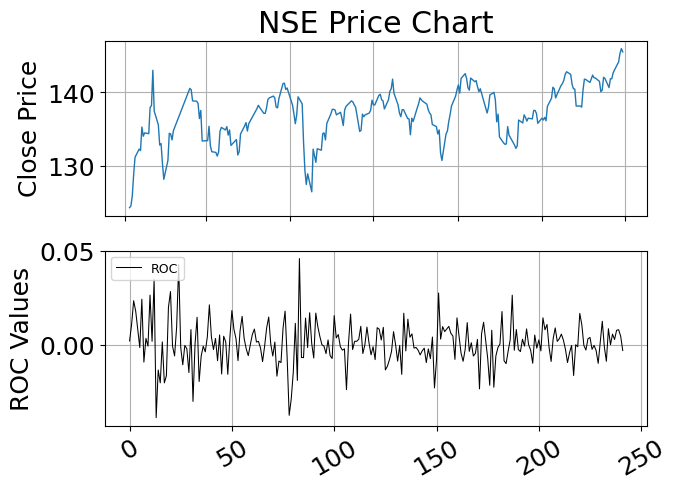

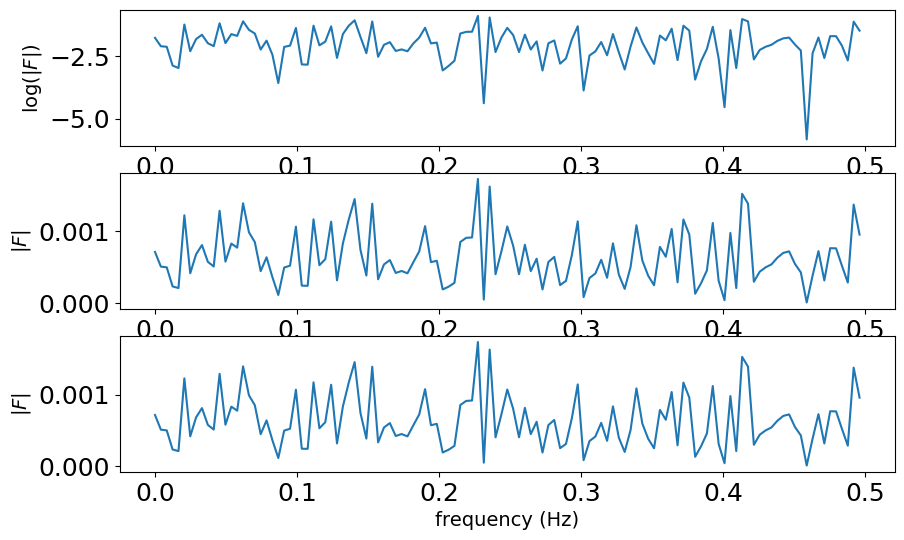

In [492]:

#import library modules
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf

#Compute Roc
def ROC(data,n):
    N=data['Close'].diff(n)
    D=data['Close'].shift(n)
    ROC=pd.Series(N/D,name='Rate of Change')
    data=data.join(ROC)
    return data

date_0 = '2021-01-01'
date_1 = '2022-01-01'
data = yf.Ticker("0050.TW").history(start=date_0, end=date_1)
data=pd.DataFrame(data)

n=1
ROC_Nifty=ROC(data,n)
ROC=ROC_Nifty['Rate of Change']

ROC = ROC.dropna()
ROC = pd.Series.to_list(ROC)
display(ROC)

#represent them in chart
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(2,1,1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('NSE Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx=fig.add_subplot(2,1,2)
plt.plot(ROC,'k',lw=0.75,linestyle='-',label='ROC')
plt.legend(loc=2,prop={'size':9})
plt.ylabel('ROC Values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(),rotation=30)
plt.show()




from scipy import fftpack
F = fftpack.fft(ROC)
N = len(ROC)
f = fftpack.fftfreq(N, 1)
mask = np.where(f >= 0) #因波形對稱性，只需看半邊
fig, axes = plt.subplots(3, 1, figsize=(10, 6))
axes[0].plot(f[mask], np.log(abs(F[mask])), label="real")
axes[0].set_ylabel("$\log(|F|)$", fontsize=14)
axes[1].plot(f[mask], abs(F[mask])/N, label="real")
# axes[1].set_xlim(0, 1)
axes[1].set_ylabel("$|F|$", fontsize=14)
axes[2].plot(f[mask], abs(F[mask])/N, label="real")
axes[2].set_xlabel("frequency (Hz)", fontsize=14)
axes[2].set_ylabel("$|F|$", fontsize=14)
plt.show()

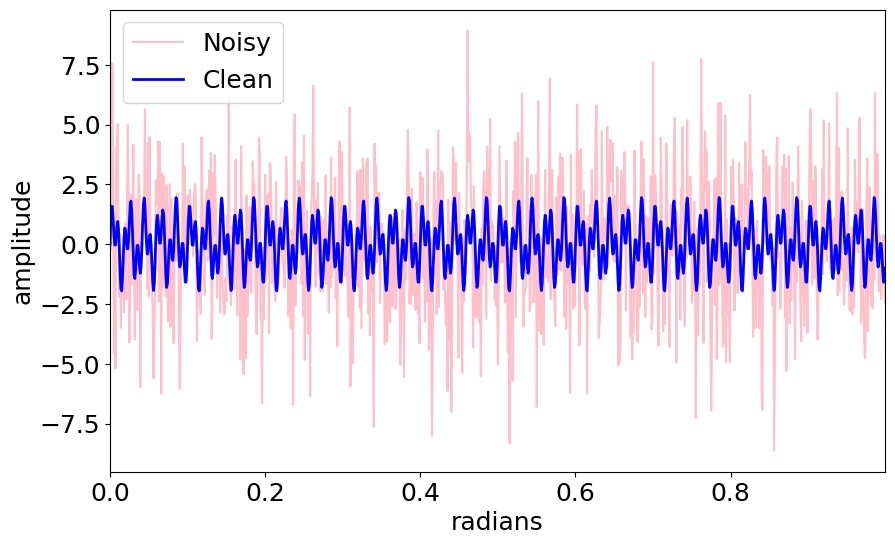

In [493]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams.update({'font.size': 18})
#create sample signal with 2 frequencies
dt=0.001
t=np.arange(0,1,dt)
f=np.sin(2*np.pi*50*t)+np.sin(2*np.pi*120*t)  #sum of 2 frequencies
f_clean = f
f=f+2.5*np.random.randn(len(t))               #Add some noise
plt.plot(t,f,color='pink',linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='blue',linewidth=2, label='Clean')
plt.xlim(t[0],t[-1])
plt.xlabel('radians')
plt.ylabel('amplitude')
plt.legend()

c:\Users\e4903\Desktop\code\venv_stock\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


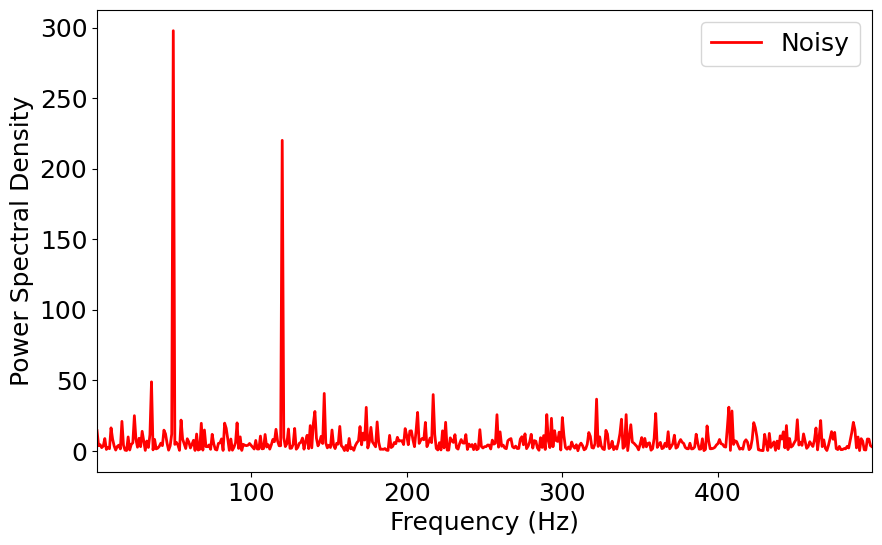

In [494]:
#compute the FFT algo
n = len(t)
fhat = np.fft.fft(f,n)                     #compute the FFT
PSD = fhat * np.conj(fhat)/n               #power spectrum 
freq = (1/(dt*n)) * np.arange(n)           #x-axis of frequencies 
L = np.arange(1,np.floor(n/2),dtype='int') #only plot 1st half
plt.plot(freq[L], PSD[L],color='red',linewidth=2, label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.legend()
plt.show()

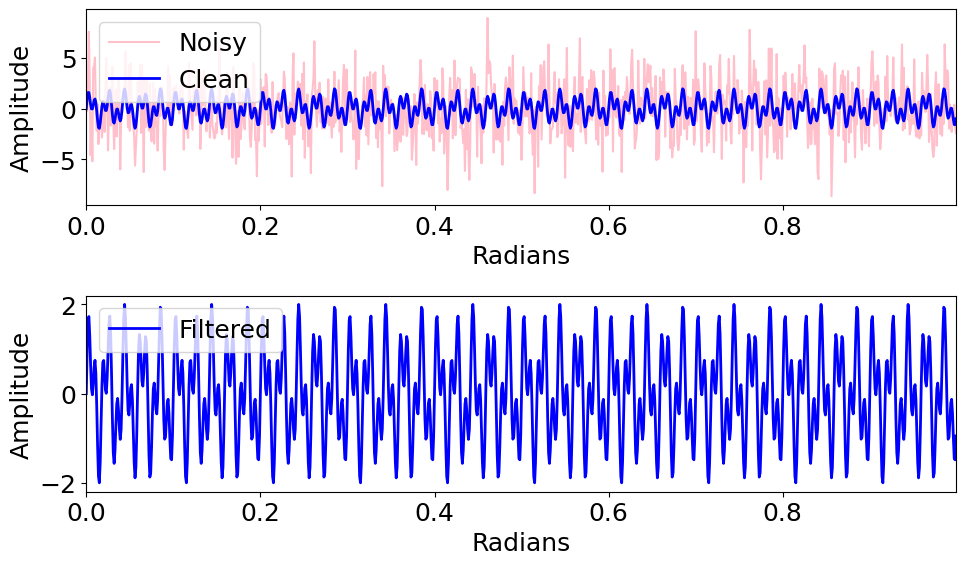

array([-0.00384585+5.68434189e-17j,  0.99427494+5.68434189e-17j,
        1.64732128+5.68434189e-17j,  1.72911644+1.13686838e-16j,
        1.29164745+2.84217094e-17j,  0.62745579+2.84217094e-17j,
        0.10563815+2.84217094e-17j, -0.02911438+5.68434189e-17j,
        0.21458185+7.35492805e-17j,  0.58746713-2.92814302e-17j,
        0.74622137-1.75655824e-17j,  0.45338605-6.70945546e-18j,
       -0.2790979 -2.29936459e-17j, -1.18199361-8.98170925e-17j,
       -1.86220005-8.48270787e-17j, -2.00640853-1.07820725e-16j,
       -1.54551212-2.70306520e-17j, -0.69117878-1.23151907e-16j,
        0.17514989+1.75655824e-17j,  0.70103045+6.70945546e-18j,
        0.74259551+8.78279122e-18j,  0.42871797+1.73748818e-16j,
        0.07633333+1.19687514e-16j,  0.00427157+7.16268864e-17j,
        0.34791979+2.70306520e-17j,  0.97640495-1.22471845e-17j,
        1.55811179+1.75655824e-17j,  1.7395519 +6.35528743e-17j,
        1.34071266+3.72045007e-17j,  0.46062892-1.56183235e-16j,
       -0.56483159-1.0212

In [495]:
#Use PSD to filter out noise
indices = PSD > 100        # Find all freqs with large power
PSDclean = PSD * indices   # zero out all others via kronecker delta
fhat = indices*fhat        # zero out small fourier coffef. in Y
ffilt = np.fft.ifft(fhat)  # inverse fFFT for filtered time signal
#plot
fig,axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(t,f,color='pink', linewidth=1.5, label='Noisy')
plt.plot(t,f_clean,color='blue', linewidth=2, label='Clean')
plt.xlim(t[0],t[-1])
plt.xlabel('Radians')
plt.ylabel('Amplitude')
plt.legend()
plt.sca(axs[1])
plt.plot(t, ffilt,color='blue',linewidth=2, label='Filtered')
plt.xlim(t[0],t[-1])
plt.xlabel('Radians')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()
display(ffilt)

<AxesSubplot: title={'center': 'TSLA stock price ($)'}, xlabel='Date'>

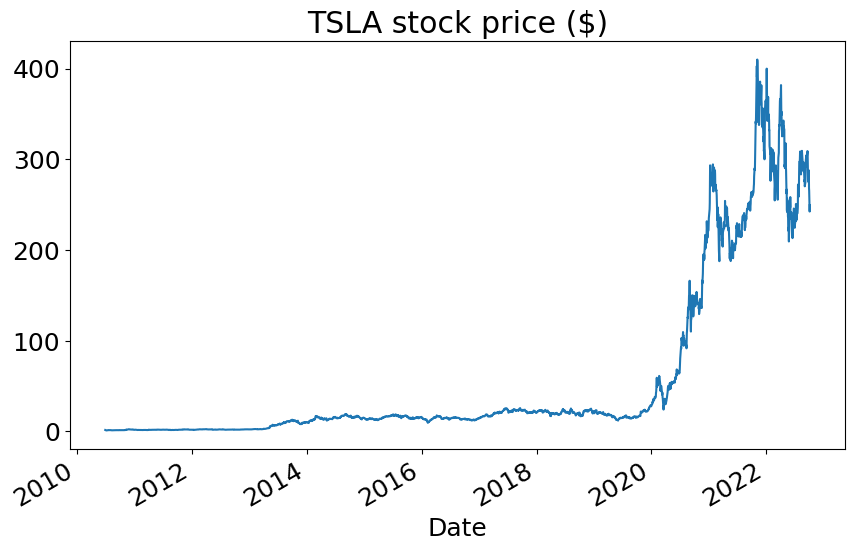

In [496]:
import yfinance as yf
import pandas as pd
ticker= yf.Ticker('TSLA')
tsla_df = ticker.history(period='max')

tsla_df['Close'].plot(title='TSLA stock price ($)')

,Close,delta,theta,amplitude,freq,regression
Date,,,,,,
1950-01-03,16.660000,0.000000,6.024309e-17,0.412308,0.000000,346.375826
1950-01-04,16.850000,0.190001,8.730032e-01,0.253837,0.000055,342.692681
1950-01-05,16.930000,0.080000,6.828144e-01,0.195237,0.000109,341.378749
1950-01-06,16.980000,0.049999,1.275388e+00,0.269568,0.000164,337.930598
1950-01-09,17.080000,0.100000,-1.121932e+00,0.220468,0.000218,328.866568
...,...,...,...,...,...,...
2022-09-28,3719.040039,71.750000,8.456467e-01,0.070415,-0.000273,3697.584386
2022-09-29,3640.469971,-78.570068,1.121932e+00,0.220468,-0.000218,3705.872218
2022-09-30,3585.620117,-54.849854,-1.275388e+00,0.269568,-0.000164,3702.613323


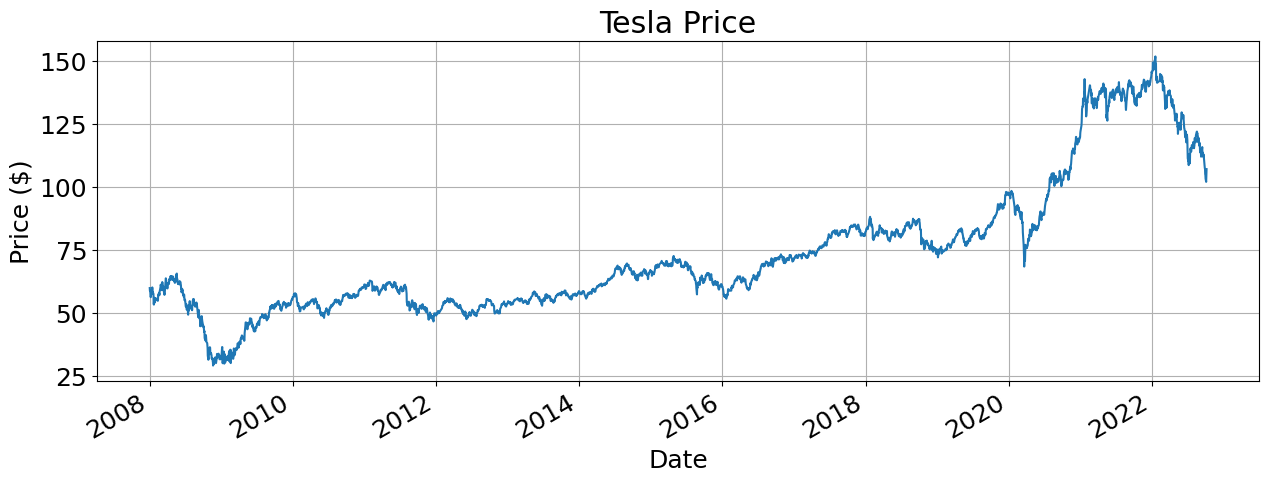

In [516]:

tsla_df = yf.download('0050.TW',
                      period='max',
                      progress=False)
df_original = tsla_df
plt.figure(figsize=(15,5))
tsla_df['Close'].plot(grid=True)
plt.ylabel('Price ($)')
plt.title('Tesla Price')
display(df_original)

In [534]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [535]:
df_original = yf.download('TSLA',
                      period='max',
                      progress=False)
# df_original.index = df_original.Date
# df_original = df_original.sort_values(by='Date', ascending=True)
df_original.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [536]:
df = df_original
df = df[['Close']]
df.head()

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000


In [537]:
#Add 0 at the beginning to match size
df['delta'] = np.append(np.array([0]),
                        np.diff(df['Close'].values))
df['delta'].head()

C:\Users\e4903\AppData\Local\Temp\ipykernel_6876\4206858930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta'] = np.append(np.array([0]),


Date
2010-06-29    0.000000
2010-06-30   -0.004000
2010-07-01   -0.124667
2010-07-02   -0.184000
2010-07-06   -0.206000
Name: delta, dtype: float64

In [538]:
sp = np.fft.fft(df['delta'].values)
sp[:10]

array([ 247.84733546+1.52766688e-13j,   99.07191747+2.06200924e+02j,
       -143.06716044+2.20431322e+02j, -255.89999513+4.92102031e+01j,
       -144.39949576-1.43957892e+02j,  -13.04972745-1.20829063e+02j,
         12.44503939-3.11100588e+01j,  -48.30423094+2.80691706e+01j,
       -106.56675279-5.72548992e+01j,  -64.12758892-1.35266703e+02j])

In [539]:
df['theta'] = np.arctan(sp.imag/sp.real)
numValues = len(df)
numValuesHalf = numValues / 2
df['amplitude'] = np.sqrt(sp.real**2 + sp.imag**2)/numValuesHalf
df['freq'] = np.fft.fftfreq(sp.size, d=1)
df.head()

C:\Users\e4903\AppData\Local\Temp\ipykernel_6876\1849574046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['theta'] = np.arctan(sp.imag/sp.real)
C:\Users\e4903\AppData\Local\Temp\ipykernel_6876\1849574046.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amplitude'] = np.sqrt(sp.real**2 + sp.imag**2)/numValuesHalf
C:\Users\e4903\AppData\Local\Temp\ipykernel_6876\1849574046.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,Close,delta,theta,amplitude,freq
Date,,,,,
2010-06-29,1.592667,0.000000,6.163741e-16,0.160471,0.000000
2010-06-30,1.588667,-0.004000,1.122900e+00,0.148117,0.000324
2010-07-01,1.464000,-0.124667,-9.951013e-01,0.170145,0.000647
2010-07-02,1.280000,-0.184000,-1.899833e-01,0.168720,0.000971
2010-07-06,1.074000,-0.206000,7.838667e-01,0.132017,0.001295


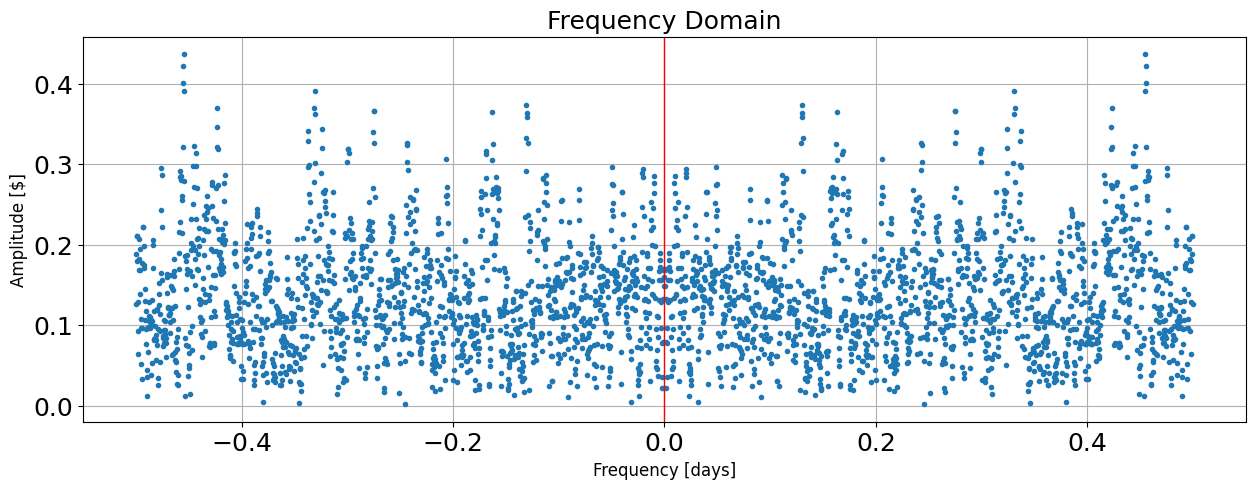

In [540]:
plt.figure(figsize=(15,5))
plt.plot(df['freq'],df['amplitude'].values, '.')
plt.axvline(x=0, ymin=0, ymax = 1, linewidth=1, color='r')
plt.ylabel('Amplitude [$]', fontsize=12)
plt.xlabel('Frequency [days]', fontsize=12)
plt.title('Frequency Domain', fontsize=18)
plt.grid()

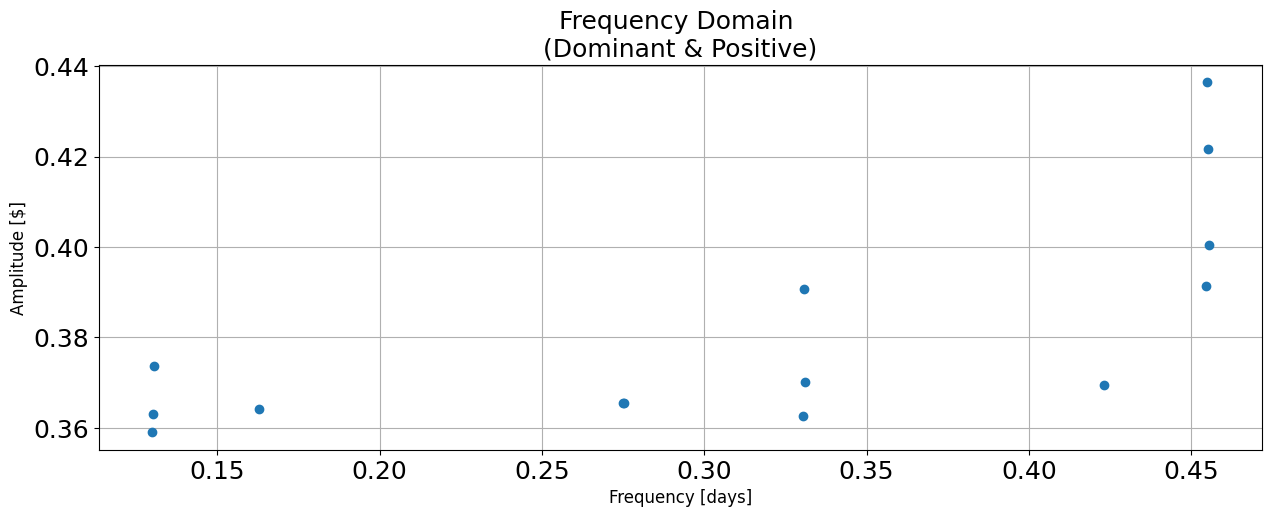

In [541]:
meanAmp = df['amplitude'].mean()
stdAmp = df['amplitude'].std()
dominantAmpCheck = df['amplitude'] > (3*stdAmp + meanAmp) 
positiveFreqCheck = df['freq'] > 0
dominantAmp = df[dominantAmpCheck & positiveFreqCheck]['amplitude']
dominantFreq = df[dominantAmpCheck & positiveFreqCheck]['freq']
dominantTheta = df[dominantAmpCheck & positiveFreqCheck]['theta']

plt.figure(figsize=(15,5))
plt.plot(dominantFreq, dominantAmp, 'o')
plt.ylabel('Amplitude [$]', fontsize=12)
plt.xlabel('Frequency [days]', fontsize=12)
plt.title('Frequency Domain \n(Dominant & Positive)', fontsize=18)
plt.grid();

In [542]:
regressionDelta = 0

for n in range(len(dominantTheta)):
    shift = dominantTheta[n]
    regressionDelta += dominantAmp[n] * np.cos(n * np.array(range(len(df))) + shift)


#Converting Delta Time to Time at start value of real data    
startValue = df['Close'][0]
regression = startValue + np.cumsum(regressionDelta)


In [544]:
display(df['regression'])

Date
2010-06-29     4.117308
2010-06-30     5.596015
2010-07-01     5.941708
2010-07-02     6.137045
2010-07-06     6.163340
                ...    
2022-09-28    16.660654
2022-09-29    18.866820
2022-09-30    19.830224
2022-10-03    19.970830
2022-10-04    20.321980
Name: regression, Length: 3089, dtype: float64

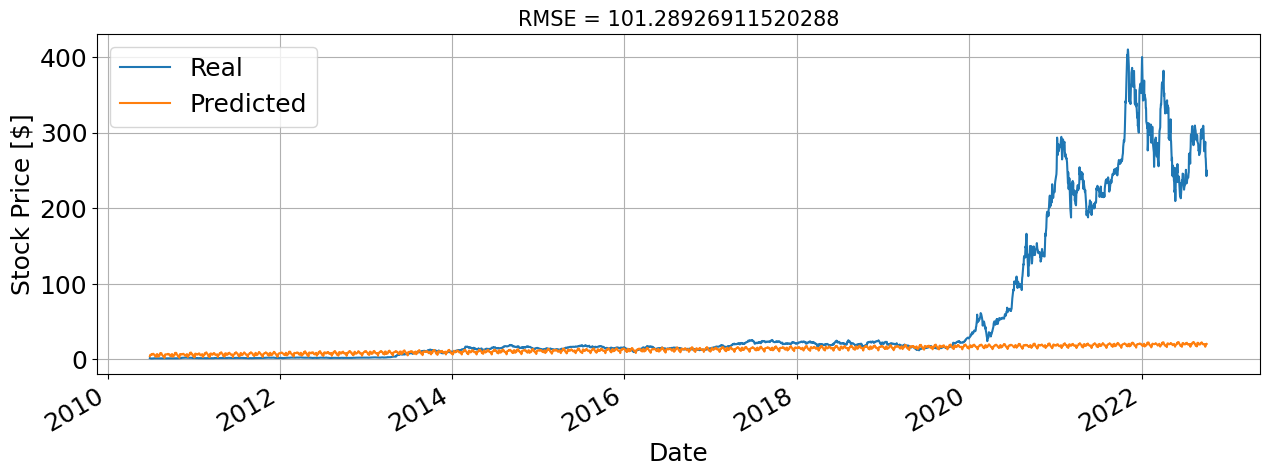

In [545]:
plt.figure(figsize=(15,5))
df['Close'].plot(grid=True)
plt.plot(df['regression'])
plt.ylabel('Stock Price [$]')
plt.legend(['Real','Predicted']);

rmse = np.sqrt(np.mean((df['Close'].values - regression)**2))

plt.title('RMSE = ' + str(rmse), fontsize=15);

In [482]:
len(regression)
df['Close']

Date
1950-01-03      16.660000
1950-01-04      16.850000
1950-01-05      16.930000
1950-01-06      16.980000
1950-01-09      17.080000
                 ...     
2022-09-28    3719.040039
2022-09-29    3640.469971
2022-09-30    3585.620117
2022-10-03    3678.429932
2022-10-04    3790.929932
Name: Close, Length: 18308, dtype: float64

In [546]:
def std_filter(std_value):
    
    #Getting dominant values based on std_value
    meanAmp = df['amplitude'].mean()
    stdAmp = df['amplitude'].std()
    dominantAmpCheck = df['amplitude'] > (std_value*stdAmp + meanAmp) 
    positiveFreqCheck = df['freq'] > 0
    dominantAmp = df[dominantAmpCheck & positiveFreqCheck]['amplitude']
    dominantFreq = df[dominantAmpCheck & positiveFreqCheck]['freq']
    dominantTheta = df[dominantAmpCheck & positiveFreqCheck]['theta']
    
    #Calculating Regression Delta
    regressionDelta = 0
    for n in range(len(dominantTheta)):
        shift = dominantTheta[n]
        regressionDelta += dominantAmp[n] * np.cos(n * np.array(range(len(df))) + shift)

    #Converting Delta Time to Time at start value of real data    
    startValue = df['Close'][0]
    regression = startValue - np.cumsum(regressionDelta)
    df['regression'] = regression
    
    #Calculating RMSE
    rmse = np.sqrt(np.mean((df['Close'].values - regression)**2))
    
    if np.isnan(rmse):
        rmse = 10000000000000
    
    return rmse

In [547]:
std_values = []
rmse_values = []

for i in np.linspace(0,2,20):
    std_values.append(i)
    rmse_values.append(std_filter(i))

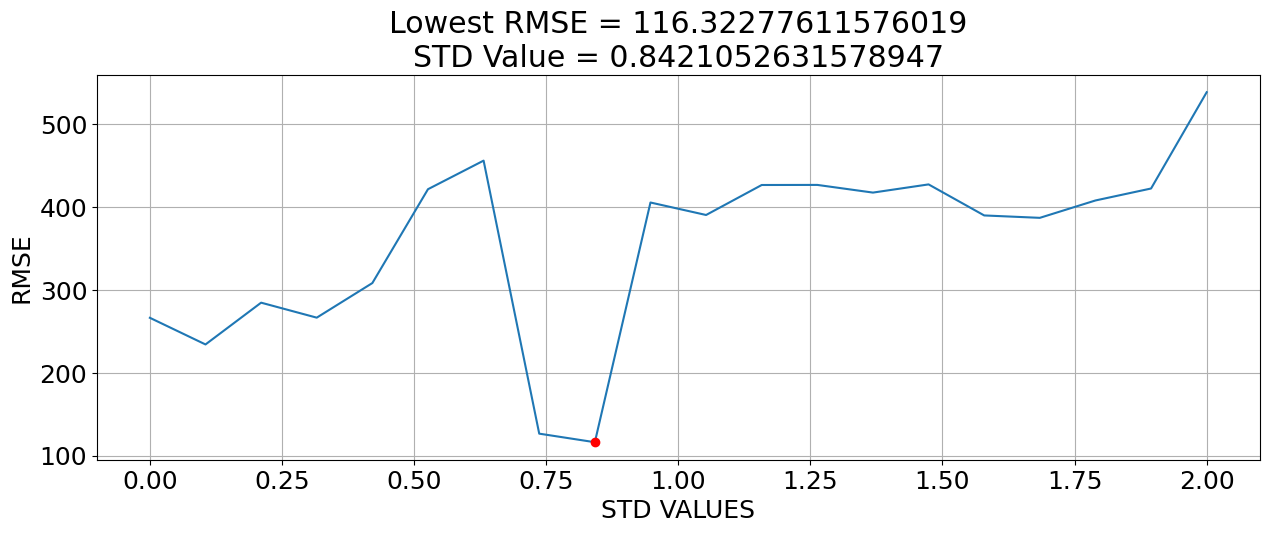

In [548]:
idx = np.array(rmse_values).argmin()
minSTD = std_values[idx]
minRMSE = rmse_values[idx]

plt.figure(figsize=(15,5))
plt.plot(std_values, rmse_values)
plt.plot(minSTD, minRMSE, 'ro')
plt.ylabel('RMSE')
plt.xlabel('STD VALUES')
plt.title('Lowest RMSE = '+str(minRMSE)+'\nSTD Value = '+str(minSTD))
plt.grid()

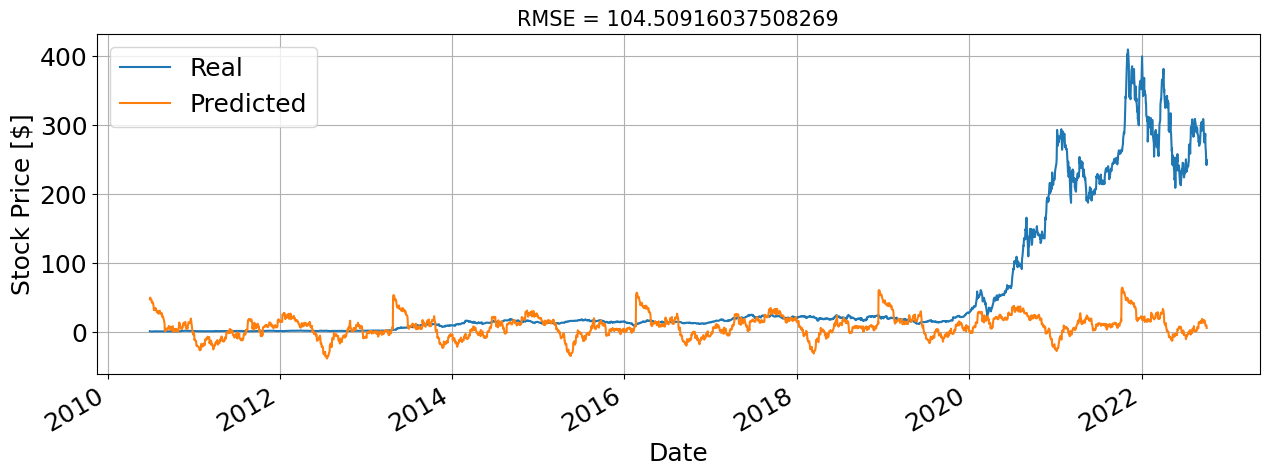

In [549]:
#Getting dominant values based on std_value
meanAmp = df['amplitude'].mean()
stdAmp = df['amplitude'].std()
dominantAmpCheck = df['amplitude'] > (minSTD*stdAmp + meanAmp) 
positiveFreqCheck = df['freq'] > 0
dominantAmp = df[dominantAmpCheck & positiveFreqCheck]['amplitude']
dominantFreq = df[dominantAmpCheck & positiveFreqCheck]['freq']
dominantTheta = df[dominantAmpCheck & positiveFreqCheck]['theta']

#Calculating Regression Delta
regressionDelta = 0
for n in range(len(dominantTheta)):
    shift = dominantTheta[n]
    regressionDelta += dominantAmp[n] * np.cos(n * np.array(range(len(df))) + shift)

#Converting Delta Time to Time at start value of real data    
startValue = df['Close'][0]
regression = startValue + np.cumsum(regressionDelta)
df['regression'] = regression

plt.figure(figsize=(15,5))
df['Close'].plot(grid=True)
plt.plot(df['regression'])
plt.ylabel('Stock Price [$]')
plt.legend(['Real','Predicted']);

rmse = np.sqrt(np.mean((df['Close'].values - regression)**2))

plt.title('RMSE = ' + str(rmse), fontsize=15);

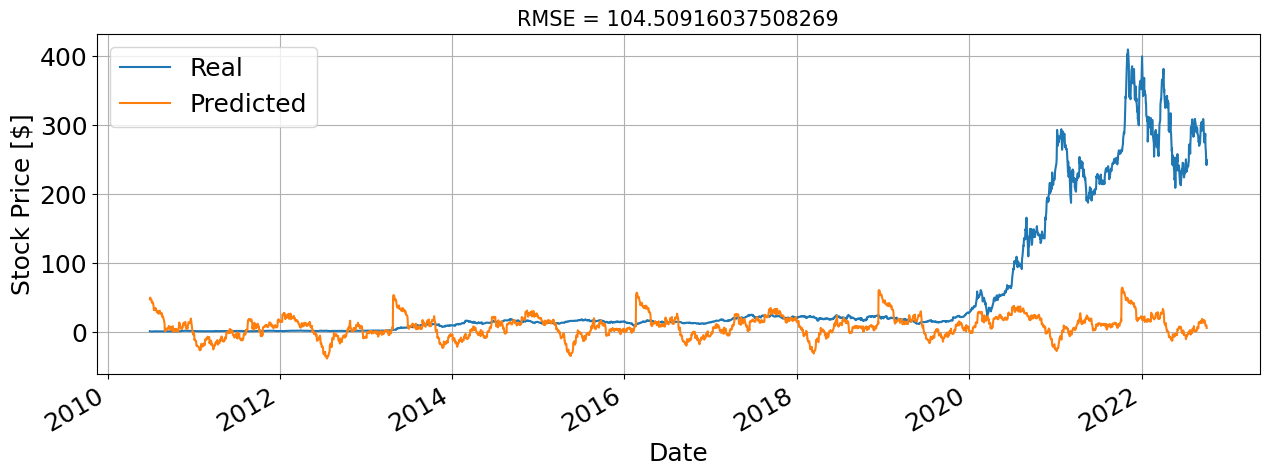

In [551]:
#Calculating Regression Delta
regressionDelta = 0
for n in range(len(dominantTheta)):
    shift = dominantTheta[n]
    regressionDelta += dominantAmp[n] * np.cos(n * np.array(range(len(df_original))) + shift)

#Converting Delta Time to Time at start value of real data    
startValue = df['Close'][0]
regression = startValue + np.cumsum(regressionDelta)
df['regression'] = regression

plt.figure(figsize=(15,5))
df_original['Close'].plot(grid=True)
plt.plot(df['regression'])
plt.ylabel('Stock Price [$]')
plt.legend(['Real','Predicted'])

# plt.axvline(x=4001, ymin=0, ymax = 1, linewidth=2, color='r')

rmse = np.sqrt(np.mean((df_original['Close'].values - regression)**2))

plt.title('RMSE = ' + str(rmse), fontsize=15);